In [58]:
%load_ext autoreload
%autoreload 2


from util_0701 import *
from myalgorithm_0701_1 import algorithm

import pandas as pd

import pickle

import matplotlib as mpl
from matplotlib import pyplot
import numpy as np
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- 실험해볼 내용들

1. weight1과 weight2의 -6~6 범위 내의 0.5 단위 구간별 비용을 heatmap으로 시각화하기

## 특정 테스트케이스의 특정 방식으로 초기 최적화한 가중치 조합별 비용 시각화

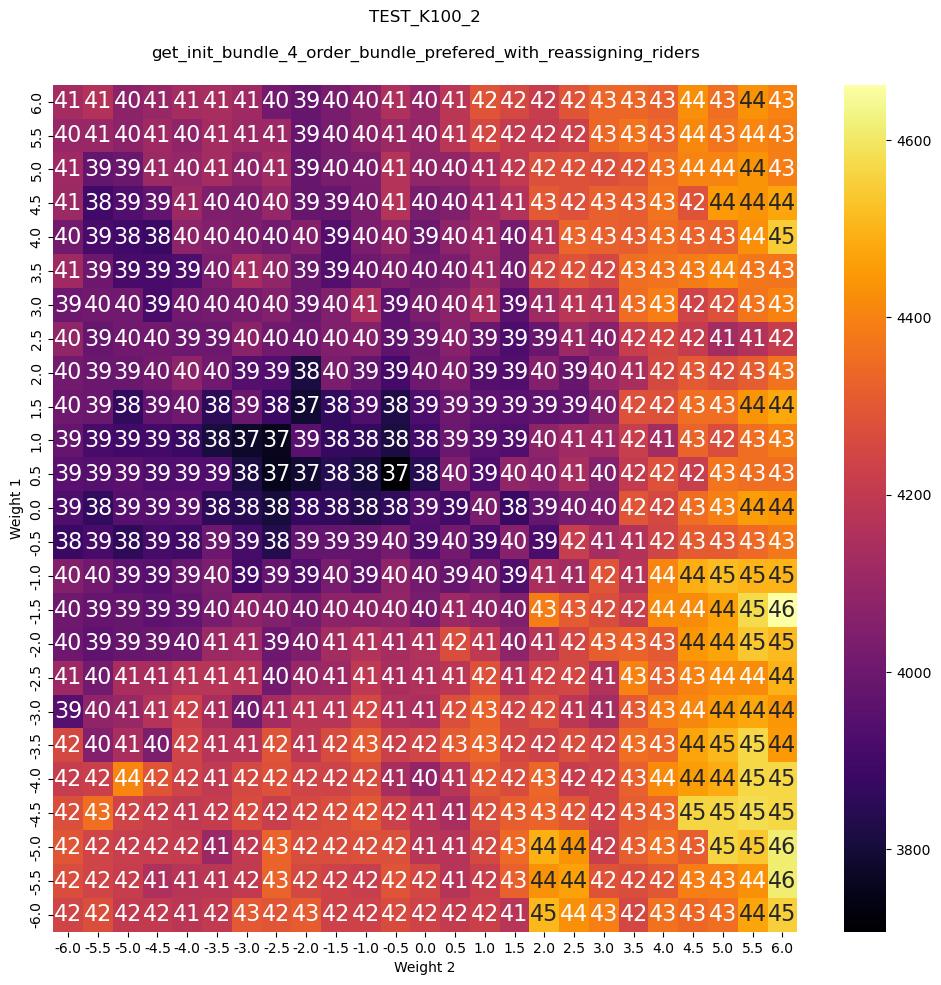

In [48]:
test_case_name = 'TEST_K100_2'
initializer_name = 'get_init_bundle_4_order_bundle_prefered_with_reassigning_riders'

with open(f'alg_test_0701_cost_by_weights/{test_case_name}-{initializer_name}.pickle', 'rb') as file:
    weight_experiment_data = pickle.load(file)

grid = [-6, -5.5, -5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]

weight_experiment_data.sort()

weight_experiment_data2 = []
labels = []
temp_labels = []
temp_data = []
for _, _, v in weight_experiment_data:
    temp_data.append(v)
    temp_labels.append(str(int(v // 100)))

    if len(temp_labels) == len(grid):
        weight_experiment_data2.append(temp_data)
        labels.append(temp_labels)

        temp_data = []
        temp_labels = []

weight_experiment_data2.reverse()
labels.reverse()

data_df = pd.DataFrame(data=weight_experiment_data2, columns=grid, index=reversed(grid))
plt.figure(figsize=(12, 11))

plt.title(f'{test_case_name}\n\n{initializer_name}\n')

ax = sns.heatmap(data_df, cmap="inferno", annot=labels, annot_kws={'fontsize': 16}, fmt='s')
ax.set_xlabel('Weight 2')
ax.set_ylabel('Weight 1')

# plt.show()
plt.savefig(f'alg_test_0701_cost_by_weights_visualized/{test_case_name}-{initializer_name}.png', bbox_inches='tight')

## 제출본 제작

In [57]:

# problem_file = '../alg_test_problems_20240429/TEST_K100_1.json'
# problem_file = '../alg_test_problems_20240429/TEST_K100_2.json'
problem_file = r'C:\Users\hsh80\Desktop\LG CNS\stage1_problems\STAGE1_4.json'
# problem_file = '../alg_test_problems_20240429/TEST_K200_2.json'

## ------------------- 초기 상태 할당 코드 -------------------------

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time).astype(int)

## --------------- 초기 번들링 최적화 코드 --------------------------

inf = float('inf')

car_rider = [rider for rider in ALL_RIDERS if rider.type == 'CAR'][0]
bike_rider = [rider for rider in ALL_RIDERS if rider.type == 'BIKE'][0]
walk_rider = [rider for rider in ALL_RIDERS if rider.type == 'WALK'][0]

init_availables = [rider.available_number for rider in ALL_RIDERS]

min_init_cost = inf
min_init_cost_bundle = []
min_init_cost_rider_availables = []

for weight1, weight2 in [(1, -1), (1, -2), (1, -2.5), (1, -3), (1, -3.5), (1, -4)]:
        bundles, result_rider_availables, cost = get_init_bundle_4_order_bundle_prefered_with_reassigning_riders(K, ALL_RIDERS, ALL_ORDERS, DIST, init_availables, weight1, weight2)

        if cost < min_init_cost:
            min_init_cost = cost
            min_init_cost_bundles = bundles
            min_init_cost_rider_availables = result_rider_availables

for rider_i in range(3):
    ALL_RIDERS[rider_i].available_number = min_init_cost_rider_availables[rider_i]
all_bundles = min_init_cost_bundles

## -------------- 솔루션 제작 및 실현 가능성 확인 코드 ---------------- 

solution = [
        # rider type, shop_seq, dlv_seq
        [bundle.rider.type, bundle.shop_seq, bundle.dlv_seq]
        for bundle in all_bundles
]

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time).astype(int)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

print(checked_solution['avg_cost'])

2778.7220000000007


### 제출본

In [59]:
problem_file = '../alg_test_problems_20240429/TEST_K100_1.json'

timelimit = 60

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])

solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)

In [60]:
with open(problem_file, 'r') as f:
    prob = json.load(f)
K = prob['K']
ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]
DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time).astype(int)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['avg_cost']

3460.855